# Introducción a la Criptografía y a la Seguridad de la información
*Juan Carlos Garavito Higuera*

---
# Taller AES

Utilizar una implementación del algoritmo AES en cualquier lenguaje de programación en el que se haga lo siguiente:

         1. Recibir como entrada cualquier imagen en cualquier formato
         2. Cifrar la imagen utilizando AES y una clave determinada por usted.
            El script o programa debe recibir por parámetro el nivel de seguridad del algoritmo (128 bits, 192 bits o 256 bits).
         3. Codificar el mensaje cifrado en Base64 (en la página del curso hay un enlace a una implementación de Base64 en python)
         4. Mostrar en la consola el texto en Base 64
         5. Decodificar desde Base64 a la representación en bits
         6. Decifrar utilizando AES
         7. Generar la imagen original y mostrarla
---







Se realizan las importaciones necesarias para el desarrollo del taller.

In [102]:
!pip install pyaes

In [103]:
import pyaes, base64, os, pathlib, string, secrets
from google.colab import files
from IPython.display import clear_output
from IPython.display import display, Image as IPythonImage

# **Recibir como entrada cualquier imagen en cualquier formato**

This functions handle the image input.

In [104]:
def UploadImage():
  uploaded = files.upload();
  image_name = list(uploaded.keys())[0];
  return image_name;

def ReadImage(input_path):
  with open(input_path, 'rb') as file: image = file.read()
  return image;

def DisplayImage(image):
  display(IPythonImage(image));

This function unifies the process of uploading the image and verifies the image is valid.

In [105]:
# Upload and Display Image
def TryUploadImage():
  image_name = UploadImage();
  image = ReadImage(image_name);

  try:
      clear_output();
      DisplayImage(image);
      image_extension = pathlib.Path(image_name).suffix;
      image_name = pathlib.Path(image_name).stem;
      return image, image_name, image_extension;
  except Exception:
      os.remove(image_name);
      clear_output();
      print("\nERROR:  The file uploaded is not an image, please try again: \n");
      return TryUploadImage();


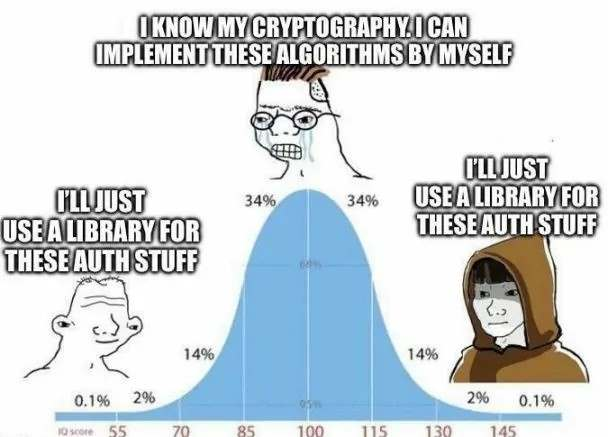

In [106]:
global image_uploaded, image_uploaded_name, image_uploaded_extension, image_name_path;
image_uploaded, image_uploaded_name, image_uploaded_extension = TryUploadImage();
image_name_path = image_uploaded_name + image_uploaded_extension;

 # **2. Cifrar la imagen utilizando AES y una clave determinada por usted. El script o programa debe recibir por parámetro el nivel de seguridad del algoritmo (128 bits, 192 bits o 256 bits).**

Esto ya ocurre en la función ReadImage:

```
def ReadImage(input_path):
  with open(input_path, 'rb') as file: image = file.read()
  return image;
```
Dado que al leer la imagen en modo de formato binario "rb" se termina guardando la repesentación del archivo en bytes, no se hace una representación en bits por lo que sería más costoso tanto en espacio como en tiempo ya que toca realizar las conversiones justo antes de cifrar y después de hacerlo.


This function converts back from byte format to the original format the image used to have.

In [107]:
def ByteToImage(byte_data, input_image_name,input_image_extension):
    # Construct the output file name with the same extension
    output_file = input_image_name+"_reconstructed" + input_image_extension;
    # Write byte data to a new file
    with open(output_file, 'wb') as f:
        f.write(byte_data);
    return output_file;

# Example usage:
global byte_data;
byte_data = image_uploaded;

In [122]:
def GenerateRandomKey(key_size_bits = 128):
  if key_size_bits not in [128, 192, 256]:
    raise ValueError("The size of the keys must be either 128, 192 or 256 bits.")
  key_size_bytes = key_size_bits // 8;
  return secrets.token_bytes(key_size_bytes); # Returns 16, 24 and 32 respectively
def AES_Cipher(key, data, encrypt = True):
  aes = pyaes.AESModeOfOperationCTR(key)
  if encrypt: return aes.encrypt(data);
  else: return aes.decrypt(data);

global key_AES, encrypted_image_AES;
key_AES = GenerateRandomKey();
print('La llave aleatoria utilizada es: ',key_AES)
encrypted_image_AES = AES_Cipher(key_AES, byte_data, encrypt = True)

La llave aleatoria utilizada es:  b'+B\xd6\x89\xfe\xa7 .]\x9e\xd8\x88K\x86b\xc5'


 # **3. Codificar el mensaje cifrado en Base64 (en la página del curso hay un enlace a una implementación de Base64 en python)**

In [109]:
def base64Encoder(data, encode = True):
  if encode: return base64.b64encode(data);
  else: return base64.b64decode(data);

In [110]:
global encoded_base64_image;
encoded_base64_image = base64Encoder(encrypted_image_AES, encode = True);

 # **4. Mostrar en la consola el texto en Base 64**


In [111]:
print(encoded_base64_image);

b'seR44G+jotGQvZiCc9qiKBCGhiSyoNXnaNGG42a4cVF6c3/YcFMQ2il2JpwCNY/x0yNBfaVh4RK3t6z01Y04LzXM3ZOsg9UxQjk8oBroyNWY3sJBCVJKCXnFDTz1uADSuOa72Lb2X7j38HdGHrTmUThXa0pg5vapvFrDVAYjUbtPh938LOJ8G+8KprJCPjbNT4BLW63y2NfhJ0397vKnjRPsSeScuQjLZn/mSzj2oG6+dW2ZQzAYGNsbiCMbcCRHJboy4rXkZTTMpkYrUb2LyNh2494aqDzB7RwnJ9Q5isYDL1Azqng1mi76WgL+RMgpx/a7WVmMerfcrrTzPnogdyWCRl5hZ0N0vQcaal2GgVDUua6XRduAjC6w4kRYKixnX3HpqAQ4wEZ1PR/3AyzqwaRW2gABOeUdwn+EykAjIiDnbEnr32HxWTU93p76srSWg68+qoGa2D2CQyY5v1OwZi9O5iGgNKHKr1QUAEv9b/tptMqBvrkCluiuIfJa4DBGRGODtgOz7qq6p1gHqg1N6ywhnI1u3jN0Tqp26c3GICjcM7l4vW8W+Xy62nPq8LJrXaEwUmDFLfEruCsxhVVKwnfpiRUkRh6arWCmbYdBate9r8LCcF5pL3aC5yG4mDCcwkiTTAlkLDqOZNkm6a/AymOkSOgNp9A9Q87rDkX940SnwPswTzR6Y+ivFiUxj0n/LwuXswQFRDqYmL5zZV4w9Y1Wwl7pjoFSYmMpK10cx4dZ1I0mQ7/XnkF1gvU9BsXl+8IkyjIJ2oI/K6RKAg3AIVS41przlDaFduvU4mojkYaio8NHiI3wdGd5XlvruC4pa4u6z5VoB81i2BLrDRriVCOP+cd1X6Enrd68zqS2g60LpLGyBRWRq0V5PzY0dYW8/7pZZ7smzFXF6wV5kC7f8Uvu8LtwiIZrhR9uPzMDVbqr7lYeqmvQgGLCQZl4JQKjyVcSyaMRv2PKHuviXIHR0JJgbTGxlV0aAB9rFS

 # **5. Decodificar desde Base64 a la representación en bits**

In [112]:
decoded_base64_image = base64Encoder(encoded_base64_image, encode = False);

# **6. Decifrar utilizando AES**

In [113]:
decrypted_image_AES = AES_Cipher(key_AES, encrypted_image_AES, encrypt = False);
assert byte_data == decrypted_image_AES

# **7. Generar la imagen original y mostrarla**

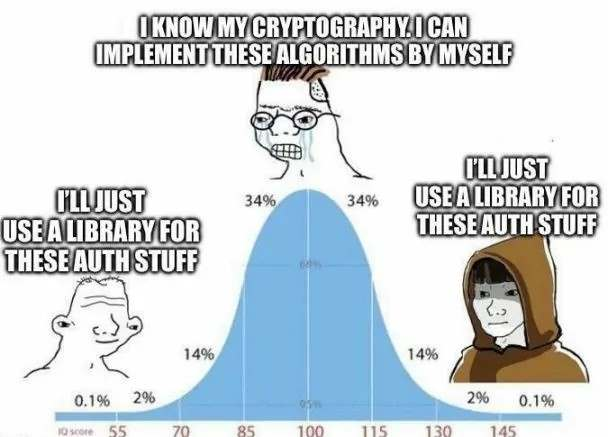

In [114]:
global recovered_image, recovered_image_path;
recovered_image_path = ByteToImage(decrypted_image_AES, image_uploaded_name,image_uploaded_extension);
recovered_image = ReadImage(recovered_image_path);
DisplayImage(recovered_image);

Uso del algoritmo para la entrega con screenshot.

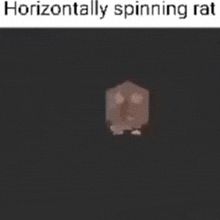

La llave aleatoria utilizada es:  b'\x89\xdb\x9d\xe5_\xae"\xe8\xc9\x8f\x1a\xabU7X\xee'


In [123]:
image_uploaded, image_uploaded_name, image_uploaded_extension = TryUploadImage();
image_name_path = image_uploaded_name + image_uploaded_extension;
byte_data = image_uploaded;
key_AES = GenerateRandomKey();
print('La llave aleatoria utilizada es: ',key_AES)
encrypted_image_AES = AES_Cipher(key_AES, byte_data, encrypt = True)

In [124]:
encoded_base64_image = base64Encoder(encrypted_image_AES, encode = True);
print(encoded_base64_image);

b'H+bUKWm7OqmGznVpPY7DyOUDR16BQMrGIyNUL3KtCXgctY3kGjaXmpVWggv6Z7Kn1iaOeFkkxmPPzQVT+C8VSsSyjIVRpa/dBWaX1apFA8n++jGnZggoiUa0G51dO+koVzwqy0JB54wuO1Qd/zKwyu9p2sKEUl88V5roqcqA7bR+SevyYBXNcLzP5LSv/zd5fceyxPtYFcvvMhxtMZ5xWwamjPDjTMRjq4uS2pM/TKp5GP9Rrhx0FsbSFpOQpHU8QluvJitiSjGjdKTDguQyKPrwdF5ilW4Xe+1M9coi2YOAs553d1BirnwJCV+GTAEAFaz2FxlGJmo+bpzV+VX6YZSNaTYlWmvdMFeVm54zTqP+0kEx6cxjy3hWGL61lH7heQssvHDjFTLUt6KEeVNKnyxF58e1odRCyu44gZ1wdgjsWQw0nJJSI1RtO8qUzLfU0MqYAaCK2Gqqp/xDOZDnogrFiQ3Gc+PSyAuSrOSlXrGcrn65Q7Iag8QkfCEQU75zImNbq+eTbzay6xe276lhCObDCschPX1oRbGYKlw1ZsaTdY+3M2y98OFdIndXF8SxbE26fZr6kNVegf/AavFVGwg0IMZYmuUA/lfePRiYsXMqwx4PZ3gWzj5bwL+xlV9/iceigGaspB4Ex1b1VhFD/qVyHCgQHpe029tN0/FvujKNYNqLNTr918fwYfecNnJ2k/VJdbV4EPIeUR/zZCxI7wyp3uuj5syOd8O5zw1TJwz3wCMeW4/RT+hlCeKOgvpCA7pe9jiUT2akZOnnrmvRSNpgpANE20SMZon0Fsi7sZD8JbjjsVsJhGe/ReqlGO/g9YvFHFPoRsSctvikdJKGSYK3wbond6VFZoO4JhYQeYwrg0rNcANKcMmil844KFE/n/jZ+7LZ6gcWU578fFCrUdzpnHC4kh9BsO2SESWCszcJLlNVjUQCsCShHkM1OJjqG3VuX9sMvl9naF78sQhsDxFjlvGevZvv0Ne2E1

In [125]:
decoded_base64_image = base64Encoder(encoded_base64_image, encode = False);
decrypted_image_AES = AES_Cipher(key_AES, encrypted_image_AES, encrypt = False);
assert byte_data == decrypted_image_AES

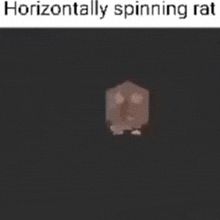

In [126]:
recovered_image_path = ByteToImage(decrypted_image_AES, image_uploaded_name,image_uploaded_extension);
recovered_image = ReadImage(recovered_image_path);
DisplayImage(recovered_image);